In [603]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style('darkgrid')

# Gather:

In [604]:
df_archive = pd.read_csv(r'C:\Users\Banana\Desktop\courses\data anaylsis udacity fwd\second project\twitter-archive-enhanced-2.csv', header=0)

In [605]:
df_image = pd.read_csv(r'C:\Users\Banana\Desktop\courses\data anaylsis udacity fwd\second project\image-predictions-1.tsv', header=0, delimiter=r"\s+")

In [606]:
df_json = pd.read_json(r'C:\Users\Banana\Desktop\courses\data anaylsis udacity fwd\second project\tweet-json.json', lines=True)


###### Taking copies of the original dataframes to work on them 

In [607]:
df = df_archive.copy()
df1 = df_image.copy()
df2 = df_json.copy()

###### Removing duplicates to merge/join the first two datasets to one dataset

In [608]:
df.drop_duplicates(subset ="tweet_id", 
                     keep = False, inplace = True) 

In [609]:
df1.drop_duplicates(subset ="tweetid", inplace = True) 

In [610]:
df_merged = df.join(df1.set_index('tweetid'), on='tweet_id')
#df_merged = pd.merge(df, df1, left_on='tweet_id', right_on='tweetid', how='left').drop('tweetid', axis=1)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Assess:

In [611]:
df_merged.info()
df_merged.p1.nunique()
df_merged.timestamp.nunique()
#len(filter(lambda df_merged: df_merged.name.str.contains(r'a'))
df_merged.describe()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [612]:
df2.info()
df2.describe()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [613]:
df2.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
33,2017-07-13 15:58:47+00:00,885528943205470208,885528943205470208,This is Maisey. She fell asleep mid-excavation...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 885528931826368512, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,36689,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2276,2015-11-19 20:14:03+00:00,667435689202614272,667435689202614272,Ermergerd 12/10 https://t.co/PQni2sjPsm,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667435686304342017, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,326,False,False,0.0,0.0,nl,NaN,NaN,NaN,NaN
1102,2016-05-24 15:55:00+00:00,735137028879360001,735137028879360000,Meet Buckley. His family &amp; some neighbors ...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 735137021832888320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3428,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
793,2016-09-07 01:47:12+00:00,773336787167145985,773336787167145984,RT @dog_rates: Meet Fizz. She thinks love is a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Sep 01 16:14:48 +0000 2016...,NaN,NaN,NaN
682,2016-10-18 16:11:17+00:00,788412144018661376,788412144018661376,This is Dexter. He breaks hearts for a living....,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788412135785267200, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,16060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
81,2017-06-19 16:24:33+00:00,876838120628539392,876838120628539392,This is Ginger. She's having a ruff Monday. To...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876838110318936065, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21125,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1229,2016-03-25 01:35:51+00:00,713177543487135744,713177543487135744,This is Lance. Lance doesn't give a shit. 10/1...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 713177538751774721, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7854,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
232,2017-03-31 16:07:33+00:00,847842811428974592,847842811428974592,"This is Rontu. He is described as a pal, cuddl...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847842804353032196, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5935,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1419,2016-02-12 17:22:12+00:00,698195409219559425,698195409219559424,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698195403653705729, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,18408,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1192,2016-04-05 19:09:17+00:00,717428917016076293,717428917016076288,This is Skittle. He's trying to communicate. 1...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,1748,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [614]:
# checks if any of columns have null values
df2.isnull().sum().any()
df_merged.isnull().sum().any()

True

In [615]:
#checks duplicates 
df_merged.duplicated().sum().any()
#df2.duplicated().sum().any()

False

##### Quality Issues Identified 
1-	Invalid rows that hold retweets not original tweets. 
2-	The null values in different columns
3-	The duplicate values in the json dataframe
4-	The extremely out of range ratings nominator 
5-	The “none’s” in the columns of dog dictionary should be recognized as nulls. 
6-	The invalid dog names that are one letter for example, this should counted either as a name or not.
7-	Many rows in the columns of dog dictionary are just nulls. 
8-	Incompleteness for the columns of the dog’s dictionary. 
For image predictions:
1-	When all the predictions of one row equal false
2-	The unapproximated values of accuracy

###### Tideness Issues Identified
1-	The columns of dog dictionary (doggo, floofer, ..) should be one column 
2-	Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.


# Clean:

#DEFINE:
Invalid rows that hold retweets not original tweets. 
Select rows that do have null values in the retweet related columns, using pandas isnull() function. You can do something like the following.

In [616]:
#CODE
df_merged = df_merged[df_merged.retweeted_status_id.isnull()]
df_merged = df_merged[df_merged.retweeted_status_user_id.isnull()]
df_merged = df_merged[df_merged.retweeted_status_timestamp.isnull()]

In [617]:
#TEST
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#DEFINE: remove garabage columns

In [618]:
#CODE
df_merged.drop('retweeted_status_id', axis=1, inplace=True)
df_merged.drop('retweeted_status_user_id', axis=1, inplace=True)
df_merged.drop('retweeted_status_timestamp', axis=1, inplace=True)
df2.drop('geo', axis=1, inplace=True)
df2.drop('coordinates', axis=1, inplace=True)
df2.drop('place', axis=1, inplace=True)
df2.drop('contributors', axis=1, inplace=True)


In [619]:
#TEST
df_merged.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  jpg_url                1994 non-null   object 
 15  img_

#DEFINE: REMOVE DUPLICATES from the json dataset

In [620]:
#CODE
#df_merged.iloc[df_merged.astype(str).drop_duplicates().index]
df2.iloc[df2.astype(str).drop_duplicates().index]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [621]:
#Remove more garabage columns
df2.drop('in_reply_to_status_id', axis=1, inplace=True)
df2.drop('in_reply_to_status_id_str', axis=1, inplace=True)
df2.drop('in_reply_to_user_id', axis=1, inplace=True)
df2.drop('in_reply_to_user_id_str', axis=1, inplace=True)
df2.drop('in_reply_to_screen_name', axis=1, inplace=True)

#DEFINE: REMOVE NULLS

In [622]:
#CODE
df_merged.tweet_id.dropna(inplace=True)
df_merged.name.dropna(inplace=True)
df2.id.dropna(inplace=True)

In [623]:
#remove names with only one character
#o_drop = ['a','b']
#f_merged[df_merged['name'].isin(to_drop)]
#[A-Za-z{,2}]
#df_merged = df_merged.query('name == "[A-Za-z{2,}]"')
#f_merged = df_merged[df_merged['name'].isin(['[A-Za-z{,2}]'])]

#DEFINE:representing nulls

In [624]:
#CODE
df_merged = df_merged.applymap(lambda x: np.nan if x == 'None' else x)

#DEFINE: the dog dictionary and stage should be one column , Replace nones with dashes for rediability 

In [625]:
df_merged.doggo.replace('None', '-', inplace=True)
df_merged.floofer.replace('None', '-', inplace=True)
df_merged.pupper.replace('None', '-', inplace=True)
df_merged.puppo.replace('None', '-', inplace=True)
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [626]:
df_merged['stage'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo

In [627]:
source_col_loc = df_merged.columns.get_loc('doggo')

In [628]:
df_merged['dogdictionary'] = df_merged.iloc[:,source_col_loc+0:source_col_loc+4].apply(
    lambda x: ",".join(x.astype(str)), axis=1)

df_merged.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,dogdictionary
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,...,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,NaN,"nan,nan,nan,nan"
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,https://vine.co/v/iEggaEOiLO3,13,10,mad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan,nan,pupper,nan"
2093,670780561024270336,NaN,NaN,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,...,0.244889,True,American_black_bear,0.056994,False,brown_bear,0.053993,False,NaN,"nan,nan,nan,nan"
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brudge. He's a Doberdog. Going to be h...,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,...,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True,NaN,"nan,nan,nan,nan"
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,...,0.341276,True,Border_terrier,0.336220,True,Gordon_setter,0.045448,True,NaN,"nan,nan,nan,nan"
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,...,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True,NaN,"nan,nan,nan,nan"
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,...,0.822936,True,malinois,0.086152,True,German_shepherd,0.063333,True,NaN,"nan,nan,nan,nan"
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,...,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False,NaN,"nan,nan,nan,nan"
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,...,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True,NaN,"nan,nan,nan,nan"
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,...,0.877021,True,Great_Dane,0.034182,True,boxer,0.028404,True,NaN,"nan,nan,pupper,nan"


In [629]:
#drop these columns
df_merged.drop('doggo', axis=1, inplace=True)
df_merged.drop('floofer', axis=1, inplace=True)
df_merged.drop('pupper', axis=1, inplace=True)
df_merged.drop('puppo', axis=1, inplace=True)

In [630]:
#clean false predictions for breed analysis
df_merged = df_merged[(df_merged['p1_dog'] == True) & (df_merged['p2_dog'] == True)]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 1 to 2355
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1348 non-null   int64  
 1   in_reply_to_status_id  11 non-null     float64
 2   in_reply_to_user_id    11 non-null     float64
 3   timestamp              1348 non-null   object 
 4   source                 1348 non-null   object 
 5   text                   1348 non-null   object 
 6   expanded_urls          1348 non-null   object 
 7   rating_numerator       1348 non-null   int64  
 8   rating_denominator     1348 non-null   int64  
 9   name                   1021 non-null   object 
 10  jpg_url                1348 non-null   object 
 11  img_num                1348 non-null   float64
 12  p1                     1348 non-null   object 
 13  p1_conf                1348 non-null   float64
 14  p1_dog                 1348 non-null   object 
 15  p2  

#DEFINE: some ratings are extremely high we need to separate them 

In [631]:
#CODE
df_overrated = df_merged[df_merged['rating_numerator'] >= 21]
df_rating_normalized = df_merged[df_merged['rating_numerator'] <= 20]
#df_rating_edited = df_rating_normalized[df_rating_normalized['rating_denominator'] == 10]

#TEST
df_rating_normalized.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.334000e+03,1.000000e+01,1.000000e+01,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,7.421025e+17,6.967373e+17,4.196984e+09,10.928786,10.002249,1.220390,0.625138,0.143429,0.060989
std,6.931163e+16,5.915439e+16,0.000000e+00,1.697762,0.351818,0.579213,0.255841,0.104763,0.052938
min,6.660209e+17,6.671522e+17,4.196984e+09,1.000000,2.000000,1.000000,0.044333,0.000023,0.000003
25%,6.783531e+17,6.716032e+17,4.196984e+09,10.000000,10.000000,1.000000,0.410522,0.055559,0.013220
50%,7.169062e+17,6.748966e+17,4.196984e+09,11.000000,10.000000,1.000000,0.626575,0.129625,0.048629
75%,7.989319e+17,6.756178e+17,4.196984e+09,12.000000,10.000000,1.000000,0.858267,0.208103,0.094788
max,8.921774e+17,8.558181e+17,4.196984e+09,14.000000,20.000000,4.000000,0.999953,0.467678,0.271042


#Building new column reperesenting a total value of the ratings 

In [632]:
#CODE
x = df_merged['rating_numerator'] / (df_merged['rating_denominator'] + 10)
df_merged['rating_value'] = x
#TEST
df_merged.describe()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 1 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1348 non-null   int64  
 1   in_reply_to_status_id  11 non-null     float64
 2   in_reply_to_user_id    11 non-null     float64
 3   timestamp              1348 non-null   object 
 4   source                 1348 non-null   object 
 5   text                   1348 non-null   object 
 6   expanded_urls          1348 non-null   object 
 7   rating_numerator       1348 non-null   int64  
 8   rating_denominator     1348 non-null   int64  
 9   name                   1021 non-null   object 
 10  jpg_url                1348 non-null   object 
 11  img_num                1348 non-null   float64
 12  p1                     1348 non-null   object 
 13  p1_conf                1348 non-null   float64
 14  p1_dog                 1348 non-null   object 
 15  p2  

###### storing the cleaned datasets

In [633]:
#Merging the 2 datasets to one cleaned dataset
df2.rename(columns = {'id':'tweet_id'}, inplace = True)
#df_merged.drop_duplicates(subset ="tweet_id", 
#                    keep = False, inplace = True)

In [634]:
df_cleaned = df_merged.merge(df2, on='tweet_id' , how = 'left')
#df_cleaned = df_merged.join(df2.set_index('id'), on='tweet_id')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1347
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1348 non-null   int64              
 1   in_reply_to_status_id          11 non-null     float64            
 2   in_reply_to_user_id            11 non-null     float64            
 3   timestamp                      1348 non-null   object             
 4   source_x                       1348 non-null   object             
 5   text                           1348 non-null   object             
 6   expanded_urls                  1348 non-null   object             
 7   rating_numerator               1348 non-null   int64              
 8   rating_denominator             1348 non-null   int64              
 9   name                           1021 non-null   object             
 10  jpg_url                 

In [635]:
df_cleaned.drop('in_reply_to_status_id', axis=1, inplace=True)
df_cleaned.drop('in_reply_to_user_id', axis=1, inplace=True)
df_cleaned.drop('expanded_urls', axis=1, inplace=True)
df_cleaned.drop('quoted_status_id', axis=1, inplace=True)
df_cleaned.drop('quoted_status_id_str', axis=1, inplace=True)
df_cleaned.drop('quoted_status', axis=1, inplace=True)

In [636]:
df_cleaned.to_csv('twitter_archive_master.csv', index=False)

### Analysis and visualization 

In [637]:
df_breeds = pd.read_csv('twitter_archive_master.csv')


Some breeds ratings 

##### Insight one
The most common owned dog breeds 

In [638]:
df_breeds.p1.value_counts()

golden_retriever      137
Labrador_retriever     86
Pembroke               82
Chihuahua              61
pug                    44
                     ... 
standard_schnauzer      1
silky_terrier           1
EntleBucher             1
groenendael             1
Japanese_spaniel        1
Name: p1, Length: 111, dtype: int64

In [639]:
df_breeds.p2.value_counts()

Labrador_retriever    86
golden_retriever      69
Cardigan              69
Pomeranian            36
French_bulldog        34
                      ..
affenpinscher          1
standard_schnauzer     1
Kerry_blue_terrier     1
giant_schnauzer        1
EntleBucher            1
Name: p2, Length: 112, dtype: int64

p1
golden_retriever    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating_value, dtype: object

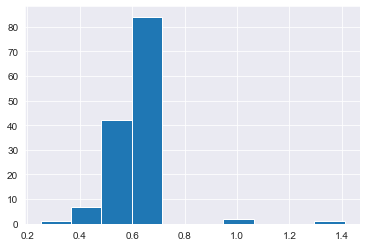

In [640]:
dfgolden = df_cleaned[df_cleaned['p1'] == 'golden_retriever']
dfgolden.groupby(['p1'])['rating_value'].hist()

p1
Afghan_hound                      AxesSubplot(0.125,0.125;0.775x0.755)
Airedale                          AxesSubplot(0.125,0.125;0.775x0.755)
American_Staffordshire_terrier    AxesSubplot(0.125,0.125;0.775x0.755)
Appenzeller                       AxesSubplot(0.125,0.125;0.775x0.755)
Australian_terrier                AxesSubplot(0.125,0.125;0.775x0.755)
                                                  ...                 
toy_poodle                        AxesSubplot(0.125,0.125;0.775x0.755)
toy_terrier                       AxesSubplot(0.125,0.125;0.775x0.755)
vizsla                            AxesSubplot(0.125,0.125;0.775x0.755)
whippet                           AxesSubplot(0.125,0.125;0.775x0.755)
wire-haired_fox_terrier           AxesSubplot(0.125,0.125;0.775x0.755)
Name: favorite_count, Length: 111, dtype: object

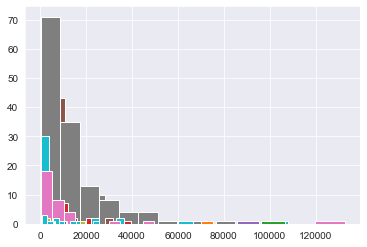

In [641]:
df_cleaned.groupby(['p1'])['favorite_count'].hist()

##### Insight two
The overrated dogs tweets timing

In [642]:
i = pd.date_range('2017-04-22', periods=4, freq='1D20min')
#df_overrated.timestamp.between_time('12:00:00', '18:00:00', index=1)
df_overrated.timestamp.head(25)

433     2017-01-15 17:52:40 +0000
516     2016-12-19 23:06:23 +0000
763     2016-09-20 00:24:34 +0000
902     2016-07-28 01:00:57 +0000
1202    2016-04-03 01:36:11 +0000
1228    2016-03-27 01:29:02 +0000
1254    2016-03-18 02:46:49 +0000
1274    2016-03-14 02:04:08 +0000
1351    2016-02-28 21:25:30 +0000
1433    2016-02-10 16:51:59 +0000
1634    2016-01-05 04:11:44 +0000
1635    2016-01-05 04:00:18 +0000
1712    2015-12-25 21:06:00 +0000
1843    2015-12-13 01:41:41 +0000
Name: timestamp, dtype: object

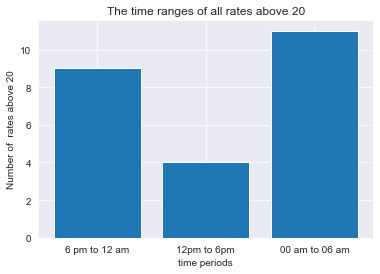

In [643]:
plt.bar([1, 2,3], [9,4,11], tick_label=['6 pm to 12 am', '12pm to 6pm', '00 am to 06 am'])
plt.title('The time ranges of all rates above 20')
plt.xlabel('time periods')
plt.ylabel('Number of  rates above 20');

##### Insight three
Does mentioning the dog name gets it higher rating ?

In [644]:
df_breeds['name'].fillna(0)
#df_rating_edited.groupby(['name'!= 'NaN'])['rating_value'].mean()
dfwithoutnames = df_breeds[df_breeds['name'].notnull()]
dfwithoutnames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1346
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1021 non-null   int64  
 1   timestamp                      1021 non-null   object 
 2   source_x                       1021 non-null   object 
 3   text                           1021 non-null   object 
 4   rating_numerator               1021 non-null   int64  
 5   rating_denominator             1021 non-null   int64  
 6   name                           1021 non-null   object 
 7   jpg_url                        1021 non-null   object 
 8   img_num                        1021 non-null   float64
 9   p1                             1021 non-null   object 
 10  p1_conf                        1021 non-null   float64
 11  p1_dog                         1021 non-null   bool   
 12  p2                             1021 non-null   o

In [645]:
dfwithnames = df_breeds[df_breeds['name'] == 0]
dfwithnames.groupby(['name'])['rating_value'].mean()

Series([], Name: rating_value, dtype: float64)

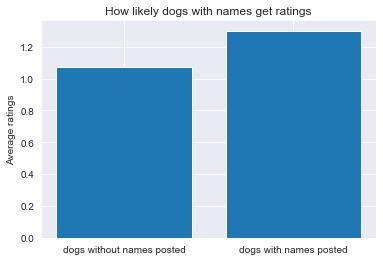

In [646]:
plt.bar([1, 2], [1.07,1.3], tick_label=['dogs without names posted', 'dogs with names posted'])
plt.title('How likely dogs with names get ratings')
plt.xlabel('')
plt.ylabel('Average ratings');

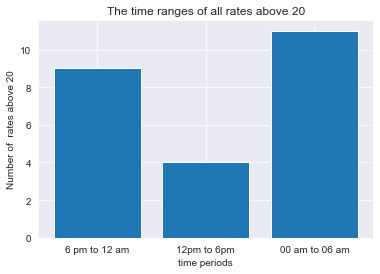

In [647]:
plt.bar([1, 2,3], [9,4,11], tick_label=['6 pm to 12 am', '12pm to 6pm', '00 am to 06 am'])
plt.title('The time ranges of all rates above 20')
plt.xlabel('time periods')
plt.ylabel('Number of  rates above 20');

##### Insight four
Which dog stage get higher ratings?

dogdictionary
doggo,floofer,nan,nan    AxesSubplot(0.125,0.125;0.775x0.755)
doggo,nan,nan,nan        AxesSubplot(0.125,0.125;0.775x0.755)
doggo,nan,nan,puppo      AxesSubplot(0.125,0.125;0.775x0.755)
doggo,nan,pupper,nan     AxesSubplot(0.125,0.125;0.775x0.755)
nan,floofer,nan,nan      AxesSubplot(0.125,0.125;0.775x0.755)
nan,nan,nan,nan          AxesSubplot(0.125,0.125;0.775x0.755)
nan,nan,nan,puppo        AxesSubplot(0.125,0.125;0.775x0.755)
nan,nan,pupper,nan       AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating_value, dtype: object

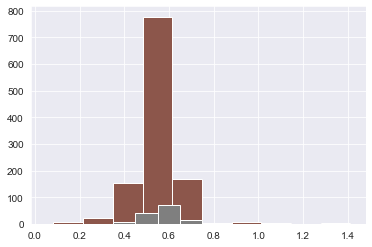

In [648]:
df_cleaned.groupby(['dogdictionary'])['rating_value'].hist()

In [649]:
df_cleaned.groupby(['dogdictionary'])['rating_value'].mean()

dogdictionary
doggo,floofer,nan,nan    0.550000
doggo,nan,nan,nan        0.597727
doggo,nan,nan,puppo      0.650000
doggo,nan,pupper,nan     0.600000
nan,floofer,nan,nan      0.600000
nan,nan,nan,nan          0.548058
nan,nan,nan,puppo        0.602778
nan,nan,pupper,nan       0.552672
Name: rating_value, dtype: float64

Text(0, 0.5, 'Average total rating')

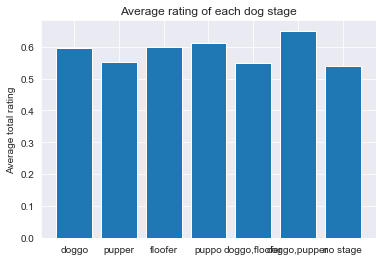

In [650]:
plt.bar([1, 2,3,4,5,6,7], [ 0.597,0.552, 0.60, 0.61,0.55, 0.65,0.54], tick_label=['doggo', 'pupper', 'floofer', 'puppo', 'doggo,floofer','doggo,pupper','no stage'])
plt.title('Average rating of each dog stage')
plt.xlabel('')
plt.ylabel('Average total rating')